In [1]:
!nvidia-smi

Sat Feb 22 09:44:37 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti      Off| 00000000:1A:00.0 Off |                  N/A |
| 16%   26C    P8                2W / 250W|     21MiB / 11264MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os

#using GPU, comment out if on CPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
import nfw

In [4]:
import jax.random as random

# Define parameters
c = 3.0  # Concentration
Rvir = 200.0  # Virial radius
nfw_profile = nfw.NFW(concentration=c, Rvir=Rvir)

# Evaluate PDF at radius r = 50
r = 50.0
print("PDF:", nfw_profile.pdf(r))

# Evaluate CDF at radius r = 50
print("CDF:", nfw_profile.cdf(r))

# Sample 5 points from the distribution
key = random.PRNGKey(42)
samples = nfw_profile.sample(key, shape=(10000,))
#print("Samples:", samples)

2025-02-22 09:44:39.497052: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.1 which is older than the ptxas CUDA version (12.8.61). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


PDF: 1.1546446
CDF: 0.20594922


Populating the interactive namespace from numpy and matplotlib


/home/ben.horowitz/.local/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(array([ 555., 1010., 1171., 1158., 1141., 1092., 1009.,  975.,  976.,
         913.]),
 array([  0.8023898 ,  20.72084427,  40.6393013 ,  60.55775452,
         80.47621155, 100.39466095, 120.31311798, 140.23156738,
        160.15002441, 180.06848145, 199.98693848]),
 <BarContainer object of 10 artists>)

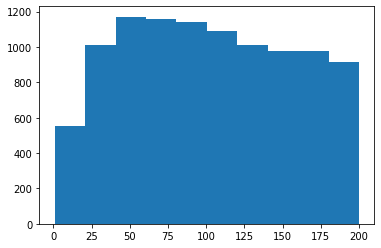

In [5]:
%pylab inline
plt.hist(samples)

In [6]:
r_array = np.linspace(0,200,200)
v_array = nfw_profile.circular_velocity(r_array)

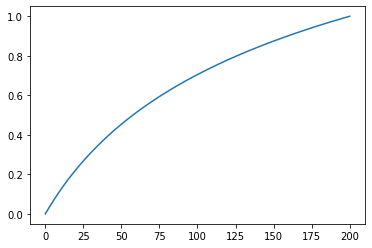

In [7]:
plt.plot(r_array, v_array)